1️⃣ Imports & Setup

In [ ]:
import random
from IPython.display import Audio


2️⃣ Router Function

In [ ]:
def route(query: str) -> str:
    q = query.lower()
    if any(k in q for k in ['plot','chart','visualize','show']):
        return 'viz'
    if any(k in q for k in ['audio','speak','voice','say']):
        return 'speech'
    return 'qa'


3️⃣ Guardrails (safety filter)

In [ ]:
BLOCK = ['malware','ssn','phi','hack','injection']

def guardrails(q: str) -> bool:
    """Block unsafe or sensitive prompts."""
    return not any(b in q.lower() for b in BLOCK)


4️⃣ Tool Definitions

In [ ]:
def tool_project_qa(query: str):
    """Calls your Week 7/8 stock-sentiment model."""
    return {"answer": run_llm(query)}

def tool_viz(query: str):
    """Creates chart based on NL → spec."""
    spec = nl_to_plot_spec(query)
    plot_from_spec(data, spec)
    return {"chart": spec['title']}

def tool_speech(query: str):
    """Speaks a fixed or model-generated sentence."""
    text = run_llm(query)
    out_path = synthesize_tts(text)
    display(Audio(out_path, autoplay=True))
    return {"speech": text}


5️⃣ Main run() Loop

In [ ]:
def run(query: str):
    if not guardrails(query):
        return {"error": "❌ Refused by guardrails."}

    r = route(query)
    if r == 'viz':
        result = tool_viz(query)
    elif r == 'speech':
        result = tool_speech(query)
    else:
        result = tool_project_qa(query)

    return {"route": r, "result": result}


6️⃣ Demo Runs (as required in deliverable)

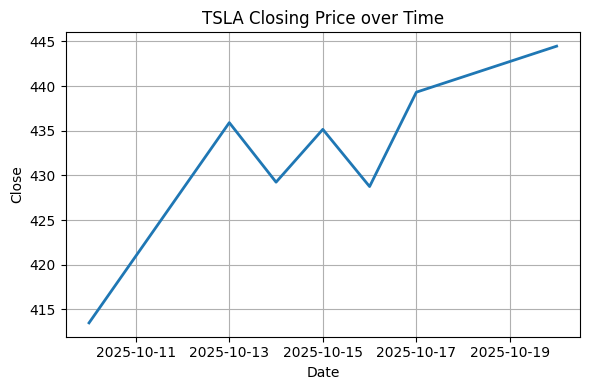

{'route': 'viz', 'result': {'chart': 'TSLA Closing Price over Time'}}


{'route': 'speech', 'result': {'speech': 'Tech stocks show mild positive momentum; energy remains neutral.'}}
{'route': 'qa', 'result': {'answer': "Couldn't analyze sentiment for apple: 'title'"}}
{'error': '❌ Refused by guardrails.'}


In [ ]:
print(run("plot Tesla closing price"))
print(run("please speak market summary"))
print(run("what is the sentiment for Apple stock"))
print(run("malware attack example"))   # should be blocked by guardrail
